# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [5]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,513,95,37,71,171,61,9,157,43,20,134,178,365,125,63,5,40,196,208
1,770,80,44,68,120,53,8,151,45,19,146,170,333,190,80,4,16,180,185
2,672,97,47,88,183,60,7,197,33,23,148,214,596,201,74,8,0,192,191
3,358,87,45,82,164,60,8,156,42,19,144,181,366,174,70,2,2,190,196
4,468,105,51,108,201,62,11,220,30,25,163,232,711,202,72,12,16,189,200
5,575,109,54,103,220,66,11,214,31,24,167,229,677,212,70,1,23,188,201
6,827,99,57,100,177,54,13,224,30,25,188,223,726,213,72,4,7,185,198
7,423,85,45,70,120,54,7,149,45,19,145,169,326,186,81,8,4,181,184
8,56,97,44,96,195,63,9,185,36,22,144,202,512,165,66,4,8,191,199
9,228,105,54,106,215,68,10,208,32,24,166,217,640,218,69,14,23,189,199


Methods `describe` and `info` deliver some useful information.

In [6]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,437.085610,93.633880,44.948998,82.400729,169.896175,61.908925,8.774135,169.448087,40.761384,20.626594,148.245902,189.233151,442.433515,174.934426,72.449909,6.389800,12.462659,188.978142,195.732240
std,243.353123,8.275305,6.144336,15.550473,33.891386,8.631068,5.123296,32.879391,7.702230,2.579556,14.567976,31.138206,175.041001,32.510460,7.704851,4.948749,8.819198,6.251093,7.436304
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,234.000000,87.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,321.000000,151.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,446.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,174.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,645.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,197.000000,46.000000,23.000000,160.000000,215.000000,578.000000,199.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,110.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [7]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [8]:
# We can't leave indeces in the data... If the dataset was already fixed, ignore the cell
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

In [9]:
### YOUR CODE HERE
# Basicly standard scalling of features
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)

X_train_sc = (X_train-mean)/std
X_test_sc = (X_test-mean)/std

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [10]:
### YOUR CODE HERE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

lgr = LogisticRegression(multi_class='multinomial', solver='saga', tol = 1e-3, max_iter=500, penalty='elasticnet' )

# the choice of parameters is mainly random here:
# c is specified from the weakest requlazation to default one
# for l1_ratio we want to cover pure l2 and l1 regs (by specifing 0 and 1 values)

param_dist = {
    'C' : [20, 9, 3, 1],
    'l1_ratio': [0, 0.5, 0.75, 1]
}
clf_lr = GridSearchCV(lgr, param_dist, scoring='accuracy', cv=5)
clf_lr.fit(X_train_sc, y_train)
print(clf_lr.best_params_)

# scalling X_test the same way X_train was transormed
X_test_sc = (X_test-mean)/std

y_pred = clf_lr.predict(X_test_sc)
pred_proba = clf_lr.predict_proba(X_test_sc)

print('Accuracy:', clf_lr.score(X_test_sc, y_test))
print('f1:', f1_score(y_test, y_pred, average = None))

{'C': 3, 'l1_ratio': 0.75}
Accuracy: 0.8148148148148148
f1: [0.94339623 0.62121212 0.69333333 0.96732026]


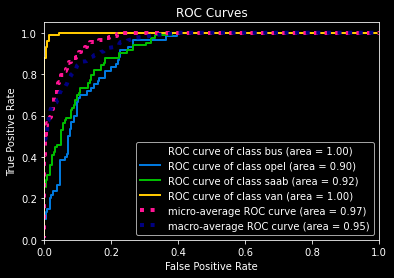

In [11]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot
import matplotlib.pyplot as plt 
from scikitplot.metrics import plot_roc

plt.style.use('dark_background')
plot_roc(y_test, pred_proba) 
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

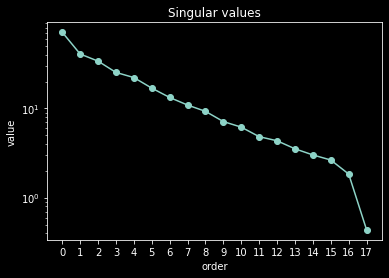

In [12]:
### YOUR CODE HERE

# PCA should be applied to normalized data
u, S, v = np.linalg.svd(X_train_sc, full_matrices=False)
plt.xticks(np.arange(0, S.shape[0], step=1))

plt.title('Singular values')
plt.xlabel('order')
plt.yscale('log')
plt.ylabel('value')

plt.plot(S, marker = 'o')
plt.show()

###### Explanation of a plot
On the plot we can see that at the 17-th order of singular value a typical break happens, when the unexplained dispersion changes rapidly to almost zero value. Therefore, we might be ok reducing the dimension by 1 (wow, what an achivement). But it won't help that much, so let's try to find optimal number of components by analyzing Phobenius norm plot (next)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

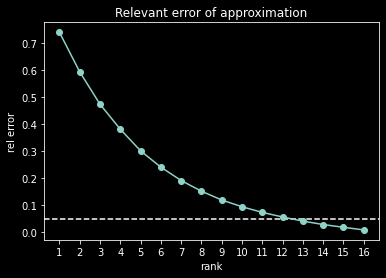

Probably we should choose 12 components


In [11]:
### YOUR CODE HERE

# we will later include PCA in pipeline, 
# but for now let's consider the question of number of components

# we're using Eckart-Young theorem about low-rank approximation
rel_err = np.array([np.sum(S[num:])/np.sum(S) for num in range (1, S.shape[0]-1)])

plt.title('Relevant error of approximation')
plt.xlabel('rank')
plt.ylabel('rel error')

# let's say error less than 0.05 is not significant to us
plt.xticks(np.arange(0, rel_err.shape[0]+1, step=1))
plt.axhline(0.05, linestyle='--')

plt.plot(np.arange(1, rel_err.shape[0]+1, step=1), rel_err, marker = 'o')
plt.show()

print('Probably we should choose {} components'.format(np.abs(rel_err-0.05).argmin()+1))

Important: PCA should be always used after the normalization, otherwise it won't work well

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

{'clf__C': 1, 'clf__l1_ratio': 0.75}
Accuracy: 0.7643097643097643
f1: [0.89308176 0.58646617 0.60402685 0.94117647]


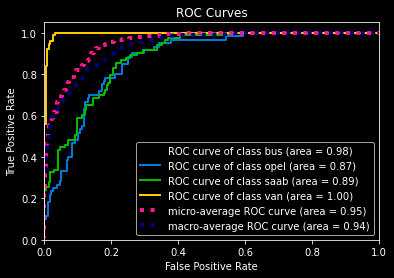

In [13]:
### YOUR CODE HERE

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

lgr = LogisticRegression(multi_class='multinomial', solver='saga', tol = 1e-3, max_iter=500, penalty='elasticnet' )
# StandardScaler->PCA->Logisti Regression
pipe_lr = Pipeline(
    steps = (
    ('scl', StandardScaler()) ,
    ('dim_red', PCA(n_components=12)) ,
    ('clf', lgr))
)

# The parameters remains the same
param = {
    'clf__C' : [14, 3, 1],
    'clf__l1_ratio': [0, 0.5, 0.75, 1]
}

clf_pl = GridSearchCV(pipe_lr, param, scoring='accuracy', cv=5)
clf_pl.fit(X_train, y_train)
print(clf_pl.best_params_)

y_pred = clf_pl.predict(X_test)
y_proba = clf_pl.predict_proba(X_test)

print('Accuracy:', clf_pl.score(X_test, y_test))
print('f1:', f1_score(y_test, y_pred, average = None))
plot_roc(y_test, y_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

{'max_depth': 28}
Accuracy: 0.7373737373737373
f1: [0.9375     0.50793651 0.60493827 0.8630137 ]


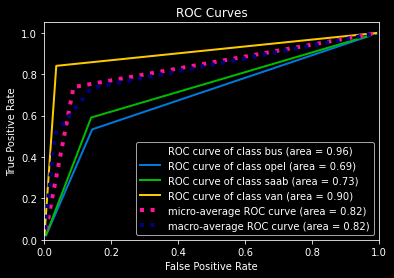

In [14]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

tree = DecisionTreeClassifier()

param = {'max_depth' : np.arange(2, 62, 2)}

# luckly, we're able to perform gridsearch on large set
clf_tr = GridSearchCV(tree, param, scoring='accuracy', cv=5)
clf_tr.fit(X_train, y_train)
print(clf_tr.best_params_)

y_pred = clf_tr.predict(X_test)
y_proba = clf_tr.predict_proba(X_test)

print('Accuracy:', clf_tr.score(X_test, y_test))
print('f1:', f1_score(y_test, y_pred, average = None))
plot_roc(y_test, y_proba) 
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [15]:
# Bootstrap
from sklearn.preprocessing import LabelEncoder
N = 100
indices = np.random.randint(X_train.shape[0], size = (X_train.shape[0], N))

# we will use LabelEncoder to store predictions
le = LabelEncoder()
le.fit(y_test)
y_test_enc = le.transform(y_test)
np.random.seed(0)

# this is where we will store predicitons for test sample
pred = np.zeros((y_test.shape[0], N), dtype='int')

#### Logistic Regression

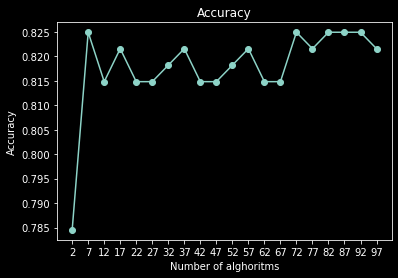

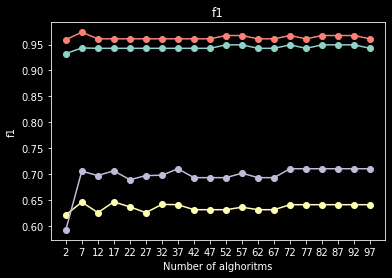

In [21]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

# just for cosmetic needs
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


pipe = Pipeline(steps = (
    ('scl', StandardScaler()) ,
    ('clf', clf_lr)))

# for N estimators we do the following
for i in range(0,N):
    # extract new subset
    X_subs = X_train[indices[:, i]]
    y_subs = y_train[indices[:, i]]
    # train the estimator
    pipe.fit(X_subs, y_subs)
    # make predicitons on test
    y_pred = pipe.predict(X_test)
    pred[:, i] = le.transform(y_pred)

# then we find the predicted labels of k-ensambles
y_pred =np.array([
    [np.argmax(np.bincount(pred[k, :i]))
    for k in range(pred.shape[0])] 
for i in range(2, N, 5)])

# calculate accuracy and f1
accuracy = [np.sum(y_pred[i] == y_test_enc)/y_test.shape[0] for i in range(y_pred.shape[0])]
f1 = np.array([])
for i in range(y_pred.shape[0]):
    f1 =np.concatenate((f1, f1_score(y_test_enc, y_pred[i], average = None)) )

# plot everything
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of alghoritms')
plt.xticks(np.arange(2, N, step=5))
plt.plot(np.arange(2, N, 5), accuracy, marker = 'o')
plt.show()

plt.title('f1')
plt.ylabel('f1')
plt.xlabel('Number of alghoritms')
plt.xticks(np.arange(2, 100, step=5))

for i in range(4):
    plt.plot(np.arange(2, N, 5), f1[i::4], marker = 'o')
plt.show()

###### Explanation
It seems like ensambling regression models is efficient only at start. (optimal - 7)
This happens because logistic regression is rather robust to data changes and threrefore bagging highly correlated estiamtors is not efficient at all.

#### Decision tree

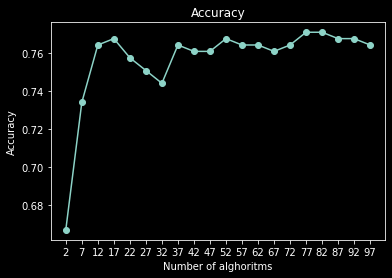

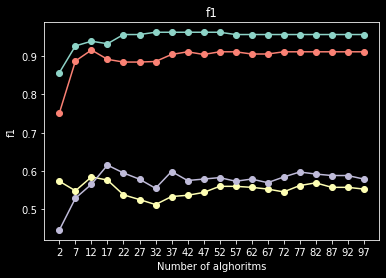

In [16]:
# YOUR CODE HERE

# do everything the same but with new base estimators
for i in range(0, N):
    # extract new subset
    X_subs = X_train[indices[:, i]]
    y_subs = y_train[indices[:, i]]
    # train the estimator
    clf_tr.fit(X_subs, y_subs)
    # make predicitons on test
    y_pred = clf_tr.predict(X_test)
    pred[:, i] = le.transform(y_pred)

# then we find the predicted labels of k-ensambles
y_pred =np.array([
    [np.argmax(np.bincount(pred[k, :i]))
    for k in range(pred.shape[0])] 
for i in range(2, N, 5)])

# calculate accuracy and f1
accuracy = [np.sum(y_pred[i] == y_test_enc)/y_test.shape[0] for i in range(y_pred.shape[0])]
f1 = np.array([])
for i in range(y_pred.shape[0]):
    f1 =np.concatenate((f1, f1_score(y_test_enc, y_pred[i], average = None)) )

# plot everything
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of alghoritms')
plt.xticks(np.arange(2, N, step=5))
plt.plot(np.arange(2, N, 5), accuracy, marker = 'o')
plt.show()

plt.title('f1')
plt.ylabel('f1')
plt.xlabel('Number of alghoritms')
plt.xticks(np.arange(2, 100, step=5))

for i in range(4):
    plt.plot(np.arange(2, N, 5), f1[i::4], marker = 'o')
plt.show()

###### Explanation
As expected, tree bagging shows better peformance than single decision tree. However, optimal number is rather small ~ 17. It might be because the train set size (549) is not big enough

Clearly, the otimal height that we found is not the one needed in bagging, since we would profit more from overtraining the trees, which would make them more uncorellated estimators.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

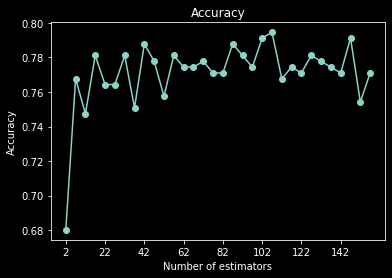

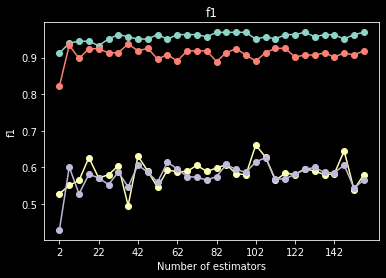

In [18]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE


numb = 160

accuracy = []
f1 = np.array([])

for num_est in range(2, numb, 5):
    clf_fr = RandomForestClassifier(n_estimators=num_est, min_samples_split = 2)
    # pca seems to play a huge role there
    pipe_fr = Pipeline(
    steps = (
    ('scl', StandardScaler()) ,
    ('clf', clf_fr))
    )
    
    pipe_fr.fit(X_train, y_train)
    
    y_pred = pipe_fr.predict(X_test)
    accuracy.append(pipe_fr.score(X_test, y_test))
    f1 =np.concatenate((f1, f1_score(y_test, y_pred, average = None)) )

plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of estimators')
plt.xticks(np.arange(2, numb, step=20))
plt.plot(np.arange(2, numb, 5), accuracy, marker = 'o')
plt.show()

plt.title('f1')
plt.ylabel('f1')
plt.xlabel('Number of estimators')
plt.xticks(np.arange(2, numb, step=20))

for i in range(4):
    plt.plot(np.arange(2, numb, 5), f1[i::4], marker = 'o')
plt.show()

The optimal number seems to be 102 (or may be higher). It is indeed different from optimal numbers of previous bagging ensambles.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [22]:
# YOUR CODE HERE

# let's split equally by class
classes = np.unique(y_train)
classes = { clas : np.where(y_train == clas)[0] for clas in classes}

accuracy_lgr = []
f1_lgr = np.array([])

accuracy_tr = []
f1_tr = np.array([])

accuracy_fr = []
f1_fr = np.array([])

for i in range(1, 11):
    split = np.array([], dtype='int')

    for key in classes:
        num = i*np.ceil(classes[key].shape[0]/10).astype('int')
        split = np.concatenate((split, classes[key][:num]) )
    X_split = X_train[split]
    y_split = y_train[split]
    
    clf_lr.fit((X_split-mean)/std, y_split)
    
    y_pred = clf_lr.predict(X_test_sc)
    pred_proba = clf_lr.predict_proba(X_test_sc)
    accuracy_lgr.append(clf_lr.score(X_test_sc, y_test))
    f1_lgr =np.concatenate((f1_lgr, f1_score(y_test, y_pred, average = None)) )
    
    clf_tr.fit(X_split, y_split)
    
    y_pred = clf_tr.predict(X_test)
    pred_proba = clf_tr.predict_proba(X_test)
    accuracy_tr.append(clf_tr.score(X_test, y_test))
    f1_tr =np.concatenate((f1_tr, f1_score(y_test, y_pred, average = None)) )
    
    pipe_fr.fit(X_split, y_split)
    
    y_pred = pipe_fr.predict(X_test)
    pred_proba = pipe_fr.predict_proba(X_test)
    accuracy_fr.append(pipe_fr.score(X_test, y_test))
    f1_fr =np.concatenate((f1_fr, f1_score(y_test, y_pred, average = None)) )

    

#### Logistic regression

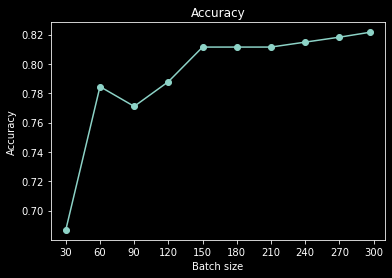

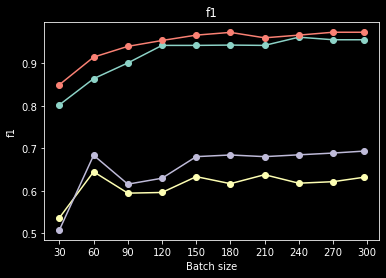

In [23]:
# logistic regression

plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Batch size')

step = np.ceil(X_test.shape[0]/10).astype('int')
plt.xticks(np.arange(0, X_test.shape[0]+10, step=step))
x = np.concatenate((np.arange(step, step*10, step=step) , np.array([X_test.shape[0]])) )
plt.plot(x, accuracy_lgr, marker = 'o')
plt.show()

plt.title('f1')
plt.ylabel('f1')
plt.xlabel('Batch size')
plt.xticks(np.arange(0, X_test.shape[0]+10, step=step))

for i in range(4):
    plt.plot(x, f1_lgr[i::4], marker = 'o')
plt.show()

The learning curve almost always grows for the logistic regression: the more data provided - the better

#### Decision tree

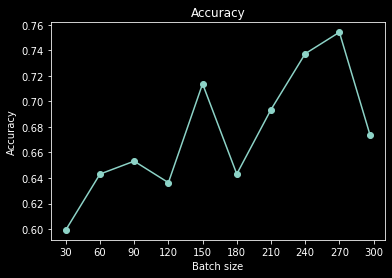

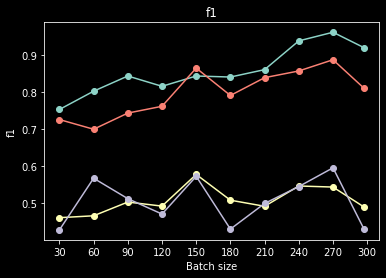

In [27]:
# Decision tree

plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Batch size')

step = np.ceil(X_test.shape[0]/10).astype('int')
plt.xticks(np.arange(0, X_test.shape[0]+10, step=step))
x = np.concatenate((np.arange(step, step*10, step=step) , np.array([X_test.shape[0]])) )
plt.plot(x, accuracy_tr, marker = 'o')
plt.show()

plt.title('f1')
plt.ylabel('f1')
plt.xlabel('Batch size')
plt.xticks(np.arange(0, X_test.shape[0]+10, step=step))

for i in range(4):
    plt.plot(x, f1_tr[i::4], marker = 'o')
plt.show()

Even if general trend is growing, it seems that decision trees are not robust to new data

#### Random forest

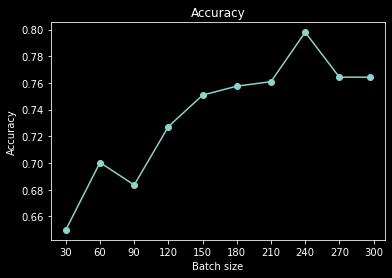

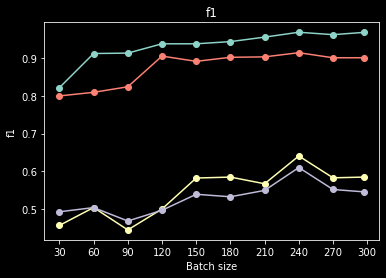

In [31]:
# Random forest

plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Batch size')

step = np.ceil(X_test.shape[0]/10).astype('int')
plt.xticks(np.arange(0, X_test.shape[0]+10, step=step))
x = np.concatenate((np.arange(step, step*10, step=step) , np.array([X_test.shape[0]])) )
plt.plot(x, accuracy_fr, marker = 'o')
plt.show()

plt.title('f1')
plt.ylabel('f1')
plt.xlabel('Batch size')
plt.xticks(np.arange(0, X_test.shape[0]+10, step=step))

for i in range(4):
    plt.plot(x, f1_fr[i::4], marker = 'o')
plt.show()

It seems like accuracy doesn't grow much after batch size ~150. So, random forest doesn't profit much from large training set